# 数式とpython packageの対応関係をとりたい。

# links (あとで整理)



https://tatamiya-practice.hatenablog.com/entry/2020/12/26/150306#fnref:3

https://gist.github.com/apetri/3a171080e9eaa987d4cb

http://pman0214.github.io/blog/fft-rfft.html

https://www.mynote-jp.com/entry/Fourier-transform-of-a-real-function

# 前提
今、$N$点の実数の時系列データ $y(t)$ が与えられている。
ここで
* $n = [0, 1, 2, ..., N-1]$
* $t = [0, \frac{1}{f_s}, \frac{2}{f_s}, ..., \frac{N-1}{f_s}] = [0, t_1, t_2, ..., T_{n-1}]$
である。($f_s$ はサンプリング周波数)

実関数　$y(t)$ の連続フーリエ変換と逆連続フーリエ変換の表式は、
$$
Y(\omega) = \int_{-\infty}^{\infty} y(t) e^{-i\omega t} dt
$$
$$
y(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} Y(\omega) e^{i \omega t} d\omega
$$

実関数 $y(n)$ の離散フーリエ変換と逆離散フーリエ変換は、
$$
Y(k) = \sum_{n=0}^{N-1} y(n) \exp \left( - i \frac{2\pi k}{N} n \right)
$$
$$
y(n) = \frac{1}{N} \sum_{k=0}^{N-1} Y(k) \exp\left( i \frac{2\pi k}{N} t\right)
$$

# PYTHONで見てみる
今、signalを
$$
y(t) = A \sin ( \omega_c t)
$$
* A = 5
* $\omega_c = 3 \pi \times 3$ [Hz] = $6\pi$ [rad/s]
* N = 100
* fs = 20 [Hz]
* T = (N-1)/fs = 4.95
にする。

In [134]:
import numpy as np

A = 5                          # Amplitude [W]
f_signal = 3                   # 周波数 [Hz]
omega_c = 2*np.pi * 3          # 各振動数 
N = 4096                       # 点数
fs = 20                        # サンプリング周波数 [Hz]
T = int(N-1)/fs                # 作成する長さ [s]


# 時刻の刻みを作成
t = np.arange(N) / fs
# 各時刻のsinを計算
signal = A * np.sin(omega_c*t)

# rms=3 [W]のノイズを加える
noise = np.random.normal(0, 0.3, N)
signal += noise

# np.fft.fftを使う場合

In [135]:
# FFT用の窓
win = np.hamming(N)
signal_nw = signal
signal_win = win * signal

# signalのN点を取り出してFFT
fft_signal_nw = np.fft.fft(signal_nw) #no window
fft_signal_win = np.fft.fft(signal_win)
# FFTの周波数を得る。
fft_freq = np.fft.fftfreq(N, 1/fs)

printすると、半分が負の周波数で、冗長であることが分かる。詳しくはここを見ると良い。
(http://pman0214.github.io/blog/fft-rfft.html)

In [136]:
print('fft_freq ,          fft_signal_win')
print(np.c_[fft_freq, fft_signal_win][:])

fft_freq ,          fft_signal_win
[[ 0.        +0.j          0.78808208+0.j        ]
 [ 0.00488281+0.j         -0.5202638 +1.84454179j]
 [ 0.00976562+0.j          2.37657176-6.13167026j]
 ...
 [-0.01464844+0.j          0.38555812+0.92145395j]
 [-0.00976562+0.j          2.37657176+6.13167026j]
 [-0.00488281+0.j         -0.5202638 -1.84454179j]]


# np.fft.rfftを使う場合

In [137]:
# signalのN点を取り出してFFT
rfft_signal_nw = np.fft.rfft(signal_nw) #no window
rfft_signal_win = np.fft.rfft(signal_win)
# FFTの周波数を得る。
rfft_freq = np.fft.rfftfreq(N, 1/fs)

負の周波数が消えて分かりやすくなっている。

In [138]:
print('rfft_freq ,          rfft_signal_win')
print(np.c_[rfft_freq, rfft_signal_win][:])

rfft_freq ,          rfft_signal_win
[[ 0.00000000e+00+0.j          7.88082077e-01+0.j        ]
 [ 4.88281250e-03+0.j         -5.20263798e-01+1.84454179j]
 [ 9.76562500e-03+0.j          2.37657176e+00-6.13167026j]
 ...
 [ 9.99023438e+00+0.j         -1.54671036e+01+8.87000824j]
 [ 9.99511719e+00+0.j          1.27108255e+01-6.66659074j]
 [ 1.00000000e+01+0.j         -1.00211244e+01+0.j        ]]


# Plot
TODをプロット

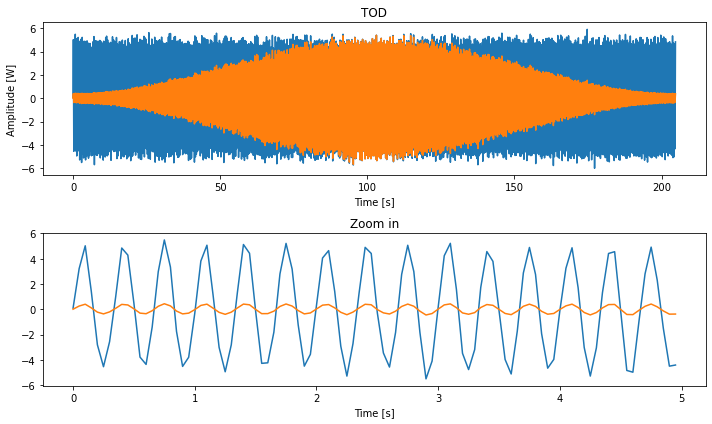

In [139]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].set_title('TOD')
ax[0].plot(t,signal_nw, label='signal')
ax[0].plot(t, signal_win, label='windowed signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [W]')

ax[1].set_title('Zoom in')
ax[1].plot(t[:100],signal_nw[:100], label='signal')
ax[1].plot(t[:100], signal_win[:100], label='windowed signal')
ax[1].set_xlabel('Time [s]')

fig.tight_layout()

# fftをプロット

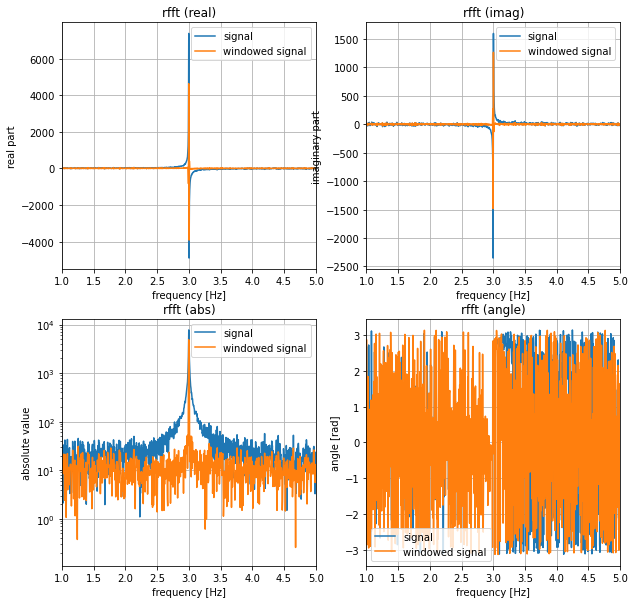

In [140]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

ax[0].set_title('rfft (real)')
ax[0].plot(rfft_freq,np.real(rfft_signal_nw), label='signal')
ax[0].plot(rfft_freq,np.real(rfft_signal_win), label='windowed signal')
ax[0].legend()
ax[0].set_xlabel('frequency [Hz]')
ax[0].set_ylabel('real part')

ax[1].set_title('rfft (imag)')
ax[1].plot(rfft_freq,np.imag(rfft_signal_nw), label='signal')
ax[1].plot(rfft_freq,np.imag(rfft_signal_win), label='windowed signal')
ax[1].legend()
ax[1].set_xlabel('frequency [Hz]')
ax[1].set_ylabel('imaginary part')

ax[2].set_title('rfft (abs)')
ax[2].plot(rfft_freq,np.abs(rfft_signal_nw), label='signal')
ax[2].plot(rfft_freq,np.abs(rfft_signal_win), label='windowed signal')
ax[2].legend()
ax[2].set_xlabel('frequency [Hz]')
ax[2].set_ylabel('absolute value')

ax[3].set_title('rfft (angle)')
ax[3].plot(rfft_freq,np.angle(rfft_signal_nw), label='signal')
ax[3].plot(rfft_freq,np.angle(rfft_signal_win), label='windowed signal')
ax[3].legend()
ax[3].set_xlabel('frequency [Hz]')
ax[3].set_ylabel('angle [rad]')

for a in ax:
    a.grid()
    xmin = 1
    xmax = 5
    a.set_xlim(xmin, xmax)

ax[2].set_yscale('log')


# 得られたFFT結果から元の信号を再現できるか、見てみる。

Text(0, 0.5, 'Amplitude [W]')

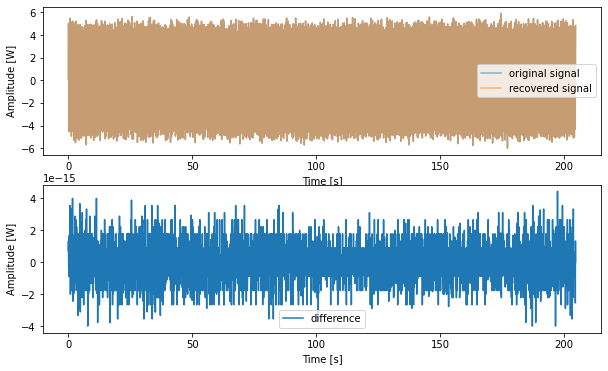

In [141]:
original_signal = signal_nw
recovered_signal = np.fft.irfft(rfft_signal_nw)
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
#plot original signal and recovered signal
ax[0].plot(t, original_signal, label='original signal', alpha=0.5)
ax[0].plot(t, recovered_signal, label='recovered signal', alpha=0.5)
ax[0].legend()
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [W]')

# plot the difference between the two signals
ax[1].plot(t, original_signal - recovered_signal, label='difference')
ax[1].legend()
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude [W]')


# Compare the Power Spectrum (scipy.signal.weltch vs from fft)

# パワースペクトルの数学的定義
離散データに対するパワースペクトル密度$\rm{PSD}$の定義は、
全測定時間 $T =n dt$ の間に、時間感覚 $dt$$ でサンプリングされた信号のような有限の時系列 $y_n = f(n,dt)$（ただし $1 ≤ n ≤ N$）に対して、
$$
\rm{PSD} = \frac{\rm{dt}^2}{T}
\left|
\sum_{n=0}^{N-1} y(n) \exp \left( - i \frac{2\pi k}{N} n \right)
\right|^2
$$
(シグナルの単位が[V]なら、[V**2/Hz]の単位)である。

# scipy.signal.weltch
* パワースペクトルの周波数とパワースペクトル密度$\rm{PSD}$(シグナルの単位が[V]なら、[V**2/Hz]の単位) を返す。
* npersegは計算時に使用するセグメントの長さ。

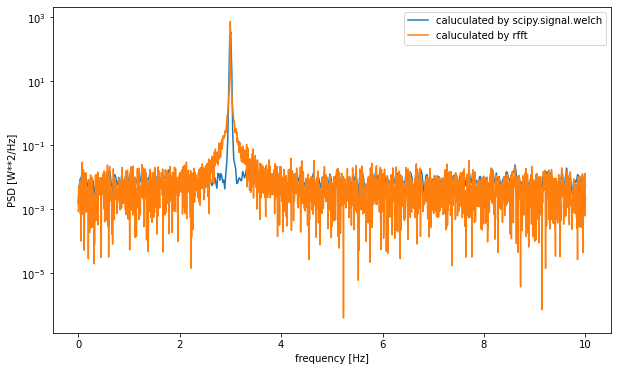

In [142]:
# calcurate the power spectrum from scipy.signal.welch
from scipy import signal
f, Pxx_den = signal.welch(signal_nw, fs, nperseg=1024)
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(f, Pxx_den, label='caluculated by scipy.signal.welch')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [W**2/Hz]')
ax.set_yscale('log')

# calcurate the power spectrum from fft
dt = 1/fs
T = N*dt
ax.plot(rfft_freq, np.abs(rfft_signal_nw)**2 * dt**2/T, label='caluculated by rfft')

ax.legend()

# PSDと時系列データの対応
参照 (https://qiita.com/yamadasuzaku/items/946eb042c7302e836c63)

興味のある部分を積分し$\sqrt{2}$倍すると、TODのsin関数のamplitudeに対応している。

In [171]:
from scipy import integrate
# integrate the power spectrum around the frequency of interest
fmin = 2.9
fmax = 3.1
idx = np.where((fmin <= f) & (f <= fmax))
power_of_interest = integrate.trapz(Pxx_den[idx], f[idx])
amplitude_of_interest = np.sqrt(2) * np.sqrt(power_of_interest)

print('integrated power', amplitude_of_interest, '[W]')


integrated power 4.996067026201353 [W]


# noiseの場合
参照 (http://jikosoft.com/cae/vibration_ana07-2.html)

全体の周波数でPSDを積分した値(から信号のパワーを引いた値)が、ノイズのRMS値になる。


In [174]:
# 全体の周波数でPSDを積分した値(から信号のパワーを引いた値)が、ノイズのRMS値になる。
power_of_all = integrate.trapz(Pxx_den, f)
print('rms of noise: ',np.sqrt(power_of_all - power_of_interest), '[W]')

rms of noise:  0.299140843658009 [W]


特定の周波数帯に興味がある場合には、以下のようにすると良い。

In [190]:
fmin = 4
fmax = 10
df_interest = fmax - fmin
idx = np.where((fmin <= f) & (f <= fmax))
power_of_interest = integrate.trapz(Pxx_den[idx], f[idx])

print('sigma of noise: ', np.sqrt(power_of_interest/df_interest), '[W/sqrt(Hz)]')
print('mean noise over 1sec: ', np.sqrt(power_of_interest/df_interest) * np.sqrt(fs) / np.sqrt(2), '[W]')

sigma of noise:  0.09563062714972069 [W/sqrt(Hz)]
mean noise over 1sec:  0.3024105958634534 [W]


In [ ]:
#